# Estimation Theory
Professor: Alberto Rodríguez Martínez.\
Communications Engineering Deparment.\
Miguel Hernandez University of Elche (Spain).

In [1]:
# --- ENVIRONMENT SETUP: works in local Jupyter and Colab ---

import sys
from pathlib import Path

# 1) Detect if we are in Colab
try:
    import google.colab  # type: ignore[unused-import]
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# 2) If in Colab, clone the repo (if not already cloned) and cd into notebooks/
if IN_COLAB:
    REPO_URL = "https://github.com/Alberto-Rodriguez-Martinez/statistical-signal-processing.git"  
    REPO_NAME = "statistical-signal-processing"   

    root_path = Path("/content") / REPO_NAME
    if not root_path.exists():
        # Clone the repo into /content
        !git clone {REPO_URL}
    # Go to notebooks folder inside the repo
    %cd /content/{REPO_NAME}/notebooks
else:
    # Local Jupyter: usually the notebook is already running from my_project/notebooks
    # If no, you can add a check here or leave it as is.
    pass

# 3) Now that we are in the correct folder, we can import from "codigo"
#    Add the project root to sys.path so "codigo" is importable
project_root = Path.cwd().parent   # notebooks → my_project
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# 4) Import config and use its paths
from codigo.config import PROJECT_ROOT, DATA_DIR

print("Running in Colab:", IN_COLAB)
print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)

Running in Colab: False
Project root: D:\Dropbox\02 UMH\00 DOCENCIA\02 MASTER\01 TDI TRATAMIENDO DIGITAL INFORMACION\03 NOTEBOOKS JUPITER\statistical_sp
Data dir: D:\Dropbox\02 UMH\00 DOCENCIA\02 MASTER\01 TDI TRATAMIENDO DIGITAL INFORMACION\03 NOTEBOOKS JUPITER\statistical_sp\data


## Introduction to Estimation Theory

Estimation theory is a branch of applied mathematics and statistics that deals with the problem of inferring the values of unknown parameters or signals from observed data that are typically contaminated by noise or uncertainty. 

Estimation is the process of inferring the value of an unknown parameter from a set of observations or data that are inherently affected by noise or random variability. In essence, we try to "guess" the true value of something we cannot measure directly, based on what we can observe.

### General Formulation of the Estimation Problem

The estimation problem is typically modeled with four interconnected components:
1. The Source and the Unknown Parameter, $\theta$:
   * There is a phenomenon or source characterized by one or more unknown parameters $\theta$. This parameter is what we wish to estimate.
   * $\theta$ resides in a "parameter space" and can be a fixed quantity (deterministic but unknown, classical approaches) or a random variable with its own probability distribution (bayeassian approaches).
2. The Probabilistic Mapping, $p(x;\theta)$:
   * This component describes how the unknown parameter $\theta$ influences the observations we can make. This is always the key point in the estimation problem.
   * Which is the function that conencts the unknown parameter and the observation?
   * It is expressed by a joint probability density function (PDF) or probability mass function (PMF), $p(x;\theta)$, which tells us the probability of observing a set of data $x$ given a particular value of the parameter $\theta$.
   * This mapping encapsulates the inherent uncertainty and noise in the measurement process.
3. The Observation Space, $x$:
    * This is the set of data or measurements that we actually obtain. These observations, $x$, are the "signals" we receive, which are affected by the parameter $\theta$ and by the uncertainty (generally considered as noise).
    * Generally, $x$ is a multidimensional vector of measurements (either continuous or discrete).
4. The Estimation Rule $g(x)$:
    * Finally, the estimation rule (or estimator) is a mathematical function, $g(x)$, that takes the available observations $x$ and transforms them into an estimate of the unknown parameter, denoted as $\hat{\theta }$, so that we obtain an estimate appliying the function $g()$ on the observed data, that is, $\hat{\theta }=g(x)$.
    * The goal is to design this rule $g(x)$ in such a way that $\hat{\theta }$ is as close as possible to the true value of $\theta$, according to certain quality criteria.

<div style="text-align: center;">
    <img src="../images/estimation_problem.png" alt="Estimation problem statement" width="600" style="border: 2px solid #4CAF50;">
</div>

**Example: Constant level embeded in noise.**

In this case, our hipotesis is that our measurement (observation), is going to be a constant embeded in additive Gaussian noise, with mean $\mu=0$, variance $\sigma^2$ (the noise mean power). 

* $V$: **unknown parameter**, the voltage
* $noise\sim N(0, \sigma^2)$ : **source of uncertainty**
* $x = V + noise$ : **obervation**
* $p(x;V)\sim N(V, \sigma^2)$ : **probabilistic mapping**
* $\hat{\theta}=1/N\sum(x)$ : **the estimate**

Note that if we repeat the experiment with other data $x$, and we apply the same estimation rule $g(x)$, we will have another estimate $\hat{\theta }$. Therefore $\hat{\theta }$ is a Random Variable.

### Quality Criteria for Estimators

Once we have the estimator $\hat{\theta }=g(x)$, how do we know it is good?. We need some quality criteria to evaluate its performance. We want our estimate to be both accurate and precise.

* **Bias** (Accuracy):
    * Concept: An estimator is **unbiased** if, on average, it hits the true target. If you were to run the estimation process many, many times, the average of all your estimates would equal the true, unknown parameter.
    * Why it's good: It means your estimator isn't systematically "off" target. It doesn't consistently over-estimate or under-estimate.
    * Analogy: Imagine aiming at a dartboard. An unbiased estimator means your darts, on average, land exactly on the bullseye, even if individual darts are scattered.
    * Mathematically: Bias is defined as **$Bias=\theta-E\{\hat{\theta}\}$**. if Bias is zero, then the estimator is unbiased.
* **Variance** (Precission/Efficiency):
    * Concept: The variance of an estimator measures how much its estimates tend to spread out around their average value. A lower variance means the estimates are more consistent and tightly clustered.
    * Why it's good: Low variance means your estimates are more reliable; they don't fluctuate wildly from one observation to the next.
    * Analogy: If your estimator has low variance, all your darts land very close to each other on the dartboard.
    * Mathematically: $Var(\hat{\theta})$ - the lower, the better.
* **Mean Squere Error, MSE** (Overall performance):
    * Concept: The Mean Squared Error (MSE) combines both bias and variance into a single measure of overall performance. It tells us the average squared difference between the estimate and the true parameter.
    * Why it's good: MSE gives a balanced view. Sometimes, a slightly biased estimator with very low variance might be preferred over a perfectly unbiased estimator with very high variance, if its estimates are consistently closer to the true value.
    * Analogy: MSE is like measuring the average squared distance of all your darts from the bullseye. It cares about both how far off your average aim is (bias) and how scattered your darts are (variance).
    * Mathematically: $MSE(\hat{\theta})=E[(\hat{\theta}-\theta)^2]=Bias^2(\hat{\theta})+Var(\hat{\theta})$

**Summary**:

* **Unbiasedness**: Are we hitting the target on average? (Accuracy)
* **Variance**: How consistently are we hitting near the same spot? (Precision)
* **MSE**: A single measure combining both, aiming for the smallest overall error (performance).

## Classic estimators:

We use them when the parameters to estimate are deterministic. We will focus on two methods: Maximum Likelihood Estimator (MLE) and Leas Square Stimetor (LSE).

#### Maximum Likelihood Estimator (MLE)
* What is it?
    * The MLE seeks the value of the unknown parameter $\theta$ that makes the probability of having observed the data we have as high as possible.
    * Think of it as: "Given what I've observed, what value of $\theta$ makes this observation most likely?"
* Basic Intuition:
    * Imagine you have a coin. You flip it 10 times and get 8 heads. What's the probability that the coin is biased towards heads? The MLE would find the probability 'p' (of getting heads) that makes observing 8 heads in 10 flips the most probable scenario. Intuitively, p=0.8 seems like a good estimate.
    * Mathematically, we define a likelihood function as $L(\theta;x)=p(x;\theta)$. The MLE is the value of $\theta$ that maximizes this function.\
      $$
      \hat{\theta}=argmax\left\{p(x;\theta)\right\}\rightarrow \hat{\theta} \quad | \quad \frac{\partial p(x;\theta)}{\partial \theta}=0
      $$
    * Usually, likelihood functions (probability density functions) are exponential functions (such as the Gaussian). Differentiating exponential functions is difficult. Instead, we use leg-likelihood functions, $ln(p(x;\theta)$, as they are easier to derivate and have the same mathematical trends, so what we do is calculate $\theta\$ such that:
      $$
      \hat{\theta} \quad | \quad\frac{\partial ln(p(x;\theta))}{\partial \theta}=0
      $$
* When to use it?
    * It's very powerful when we know (or can assume) the probability distribution of the noise or the data (e.g., Gaussian noise).
    * It's the foundation for many estimators in signal processing and machine learning (e.g., logistic regression, neural networks often optimize a form of likelihood).
* Key Advantages (simplified!):
    * Under certain conditions, it's optimal (achieves the minimum possible variance for an unbiased estimator, known as the Cramer-Rao bound).
    * Often yields unbiased and low-variance estimators for large amounts of data.
    * It's a very general and flexible framework.

**Example: Constant level embeded in noise.**

In this case, our hipotesis is that our measurement (observation), is going to be a constant mebeded in additive Gaussian noise, with mean $\mu=0$, variance $\sigma^2$ (the noise mean power). But now, we will take a few samples, let's say we take N samples. Which will be the MLE?

* $V$: **unknown parameter**, the voltage
* $noise[n]\sim N(0, \sigma^2) \quad \forall n$ : **source of uncertainty**, each sample of noise is a escalar.
* $x[n] = \underline{x} = V + noise[n]$ : **obervation**, where $\underline{x}$ it is a vector of random variables
As we assume that the samples $x[n]$ are independent and identiaclly distirbuted, the **joint probability density function **will be the porduct of the probability density function of each sample, which are $p(x[i];V)\sim N(V,\sigma^2)$, tha means that the **probabilistic mapping** will be:
$$
p(\underline{x};V)=\prod_{i=1}^{N}p(x[i];V)=\prod_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x[i]-V)^2}{2\sigma^2}}=(2\pi\sigma^2)^{-N/2}\cdot e^{-\frac{\sum_{i=1}^{N}((x[i]-V)^2)}{2\sigma^2}}=(2\pi\sigma^2)^{-N/2}\cdot e^{-\frac{\sum_{i=1}^{N}(x[i]^2-2x[i]V+V^2)}{2\sigma^2}}
$$
But now we calculate the log-likelihood function, $ln(p(x,\theta)$:

$$
\begin{gather}
ln(p(\underline{x};V))=-2/N\cdot ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}\cdot \sum_{i=1}^{N} \left ( x[i]^2-2x[i]V+V^2 \right)\\
\frac{\partial ln(p(x;\theta))}{\partial \theta}=-\frac{1}{2\sigma^2}\cdot \frac{\partial \sum_{i=1}^{N} \left ( x[i]^2-2x[i]V+V^2 \right)}{\partial V}=\frac{1}{2\sigma^2}\cdot\left ( 2\sum_{i=1}^{N}x[i]-2\sum_{i=1}^{N}V \right )=0\\
V=1/N\cdot \sum_{i=1}^{N}x[i]
\end{gather}
$$

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
# Set constans
V = 0.322 # constant value

# We model the noise sample using python libraries that model random distributions
var = 0.01 # the variance, or mean power in case or white gaussian noise
std = np.sqrt(var) # note that the standard deviation can generally be calculated as the square root of the variance
mean = 0 # the mean
noise = np.random.normal(mean, std) # Gaussian with mean mu and standard deviation sd
X = V + noise # According to our model observed (measured) sample is the sum of the real value plus the noise

print(f"The real value of the voltage is {V:.4f}")
print(f"The measured voltage is {X:.4f}")
print(f"The noise is {noise:.4f}")
print(f"The standard deviation of the estimator is {std:.4f}")

The real value of the voltage is 0.3220
The measured voltage is 0.3768
The noise is 0.0548
The standard deviation of the estimator is 0.1000


Now, we have to analyze if this is a good method to asses the battery voltage. If you remember anything from your classes of statistics, a gaussian distribution of mean $\mu_V$ and standard deviation $\sigma$, will produce values around the mean with certain probability according to the Gaussian distribution.

| Interval | Probabilit |
|----------|----------|
| $\mu_V+\sigma$ | $\approx 68.27\%$| 
| $\mu_V+2\sigma$ | $\approx 95.45\%$| 
| $\mu_V+3\sigma$ | $\approx 99.73\%$| 

If the noise power is for example $\sigma^2=0.01$, that means that the standard deviation is $\sigma=0.1$. Now, if the real voltage was $V=0.322$ volts, we will measure values within the following intervals with the corresponding probabilities.

| Interval | Probability |
|----------|----------|
| $[0.272, 0.372]$ | $\approx 38.3\%$| 
| $[0.222, 0.422]$ | $\approx 68.27\%$| 
| $[0.122, 0.522]$ | $\approx 95.45\%$| 
| $[0.022, 0.622]$ | $\approx 99.73\%$| 

As you can see, this is not a very good estimator.

We will procede now as we derive in the MLE, that is, take $N$ samples and average them.


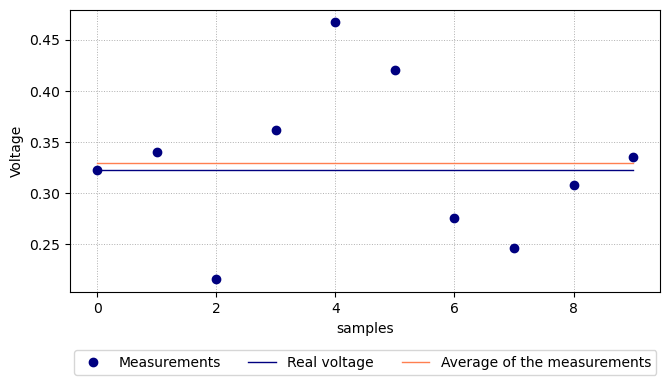

The real value of the voltage is 0.3220
The measured voltage is 0.3289
The noise is -0.0069
The standard deviation of the estimator is 0.0316


In [3]:

# take N samples
N = 10 # number of samples qe acquiere and average
x = V + np.random.normal(loc=mean, scale=std, size=N) # generate 10 samples of noise and ad the real voltage

# --- Plot ---
plt.figure(figsize=(7, 4))
plt.plot(x, 'o', color='navy', label='Measurements')
plt.plot(np.ones(np.size(x))*V, linewidth=1, color='navy', label='Real voltage')
plt.plot(np.ones(np.size(x))*np.mean(x), linewidth=1, color='coral', label='Average of the measurements')

plt.xlabel('samples')
plt.ylabel('Voltage')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

print(f"The real value of the voltage is {V:.4f}")
print(f"The measured voltage is {np.mean(x):.4f}")
print(f"The noise is {V-np.mean(x):.4f}")
print(f"The standard deviation of the estimator is {std/np.sqrt(N):.4f}")

We could calculate now the bias and the variance of the estimator. It is easy to demonstrate the the bias is 0, so the estimator is unbiased. Also the variance can be calculates and it is $var(\hat{V})=\sigma^2 / N$, which is much better that the previous one, just $\sigma^2$. We can plot the likelihood functions of the two estimators.


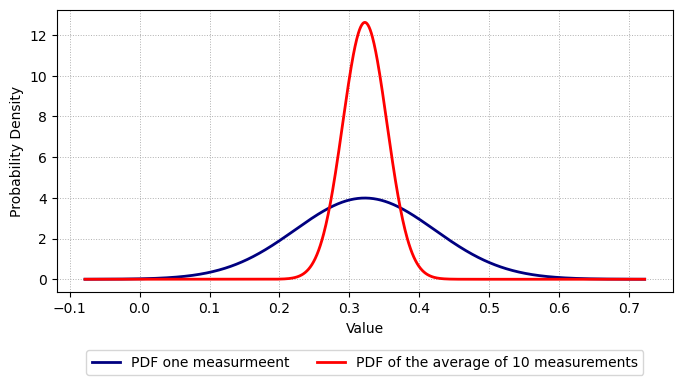

In [4]:
from scipy.stats import norm
# --- range and PDF ---
std_V = std/np.sqrt(N)
x = np.linspace(V - 4*std, V + 4*std, 1000)
pdf = norm.pdf(x, loc=V, scale=std)
pdf_av = norm.pdf(x, loc=V, scale=std_V)

# --- Plot PDF ---
plt.figure(figsize=(7, 4))
plt.plot(x, pdf, linewidth=2, color='navy', label='PDF one measurmeent')
plt.plot(x, pdf_av, linewidth=2, color='red', label=rf'PDF of the average of {N} measurements')

# --- labels and format ---
#plt.title(rf'$P(X \\le Threshold) = {p_below:.3f}$  for  $X \sim \mathcal{{N}}(\mu={mean_V},\,\sigma={std})$')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.show()

### Least Square Estimator (LSE)

* **What is it?**
    * The LSE seeks the value of the unknown parameter $\theta$ that minimizes the sum of the squared errors $J(\theta)$ between the model and the observed data.
    * Think of it as: "I want my model, parameterized by $\theta$, to fit my data as best as possible, by minimizing the total difference."
        * Assumes that 𝜃 is deterministic.
        * $p(x;\theta)$ is not needed.
        * There is no need of a det. signal model.

* **Basic Intuition**: Imagine you have data points and you want to draw the "best-fit" straight line through them. The LSE finds the slope and intercept of that line that makes the vertical distances (residuals) from each point to the line, when squared and summed, as small as possible.
    * The "error" here is the difference between the observed value and the value predicted by the model for a given $\theta$.
* **When to use it?**
    * Very common in regression problems (curve fitting, linear modeling) when we want to find a relationship between variables.
    * It's the go-to estimator when the noise is Gaussian, zero-mean, and constant variance (Additive White Gaussian Noise - AWGN). In this specific case, the LSE is identical to the MLE!
* **Key Advantages**:
    * Easy to understand and implement.
    * Mathematically tractable (often has a closed-form solution).
    * Robust for many practical problems.
* **Mathematical model**: The unknown parameters $\theta$ are used to model a function that produces data $s[n]$. We compare the data with the observation, and chose the $\theta$ that minimizes the square error.
    * $\theta$: Unknown paramaters
    * $x[n]$: Observation
    * $\epsilon[n] = x[n]-s[n]$: error
    * $J(\theta)$: Square error, also called **Cost Function**
<div style="text-align: center;">
    <img src="../images/LSE_Model.png" alt="LSE model" width="400" style="border: 2px solid #4CAF50;">
</div>
$$
\begin{gather}
J(\theta)=\sum_{i=1}^{N}\epsilon[n]^2=\sum_{i=1}^m{N}(x[n]-s[n])^2\\
\hat{\theta}\rightarrow \frac{\partial J(\epsilon)}{\partial \theta}=0
\end{gather}
$$ 

* **General linear model**: LSE is specially fitted for linear models with additive noise. In this case, the solution is straigh forward.

<div style="text-align: center;">
    <img src="../images/LSE_Linear_model.png" alt="LSE General Linear Model" width="600" style="border: 2px solid #4CAF50;">
</div>

In this example, we observe that the data suggest a linear model, as it seems to follow parabolic trend.

<div style="text-align: center;">
    <img src="../images/example_LMS_Linear.png" alt="Example of LSE General Linear Model" width="600" style="border: 2px solid #4CAF50;">
</div>

* Model parametrization:
    * $x[n]=\underline{x}\sim N \times 1$, observation.
    * $s(n,\theta)=\underline{s}(\theta)=H\theta+b,\quad \sim N\times 1$, model data.
    * $\underline{\theta}\sim 1\times p$, unknown parameters.
    * $\underline{\underline{H}}\sim N \times p$, observation matrix.
    * $b\sim N \times 1$, ofsset (known, constants or zero).
    * Solution: (assuming $b=0$)
$$
\begin{gather}
J(\theta)=\sum_{i=1}^{N}\epsilon[n]^2=\sum_{i=1}^m{N}(x[n]-s[n])^2=(\underline{x}-\underline{\underline{H}} \underline{\theta})^T(\underline{x}-\underline{\underline{H}} \underline{\theta})=\underline{x}\underline{x}^T-2\underline{x}^T\underline{\underline{H}} \underline{\theta}+\underline{\theta}^T\underline{\underline{H}}^T\underline{\underline{H}}\underline{\theta}\\
\hat{\theta}\rightarrow \frac{\partial J(\epsilon)}{\partial \theta}=0\rightarrow -2\underline{\underline{H}}^T\underline{x}-2\underline{\underline{H}}^T\underline{\underline{H}}\hat{\theta}\\
\hat{\theta}=(\underline{\underline{H}}^T\underline{\underline{H}})^{-1}\underline{\underline{H}}^T\underline{x}\\
J_{min}=J(\hat{\theta})=\underline{x}^T\left ( I-H(\underline{\underline{H}}^T\underline{\underline{H}})^{-1}\underline{\underline{H}}^T \right ) \underline{x}
\end{gather}
$$ 


**When to use each (or how are they related)?**

* **LSE is a special case of MLE**: If you assume that the errors or noise in your measurements are Gaussian, independent, and have the same variance, then the Least Squares Estimator (LSE) is exactly the same as the Maximum Likelihood Estimator (MLE)!
* **MLE is more general**: If the noise distribution is not Gaussian (e.g., exponential, Poisson), or if it's more complex, then MLE is the way to go, as it can adapt to any known distribution. LSE, on the other hand, is intrinsically tied to minimizing squared errors.
* **In practice**: Both are fundamental tools. LSE is often the starting point due to its simplicity and good properties if the noise is Gaussian. MLE is the preferred method when you have more knowledge about the underlying distribution of the data and noise.



**Example: Estimating the focal point of a focused ultrasonic transducer**
In this practice, we will see a real case of applying parameter estimation to solve an engineering problem. Specifically, it involves characterizing the propagation beam of an ultrasonic transducer used for non-destructive material analysis. This type of transducer has a beam shape such that the maximum energy is concentrated at a certain distance from the transducer surface (focal distance), which should be the distance at which the elements to be analyzed are located. The following figure schematically represents the beam of a generic focused transducer.

<div style="text-align: center;">
    <img src="../images/focused_transducer.png" alt="Example of focused_transducer" width="400" style="border: 2px solid #4CAF50;">
</div>

We will try to estimate the focal distance of the transducer from calibration measurements. The calibration measurements will consist of obtaining the maximum received ultrasonic signal when a reference reflector is illuminated at different distances. That is, a reflector is placed on the transducer surface and moved away from it in 2mm intervals while ultrasonic pulses are generated and the reflected signals are recorded. Then, the maximum of each reflected pulse is measured, thus obtaining the trend of the acoustic field's maximum as a function of the reflector's distance from the transducer. We are now going to load and plot some data, to see if there is any trend that help us bulid a model. We will repeat the experiment 10 times, and then average the measurements at each distance to reduce the variance.

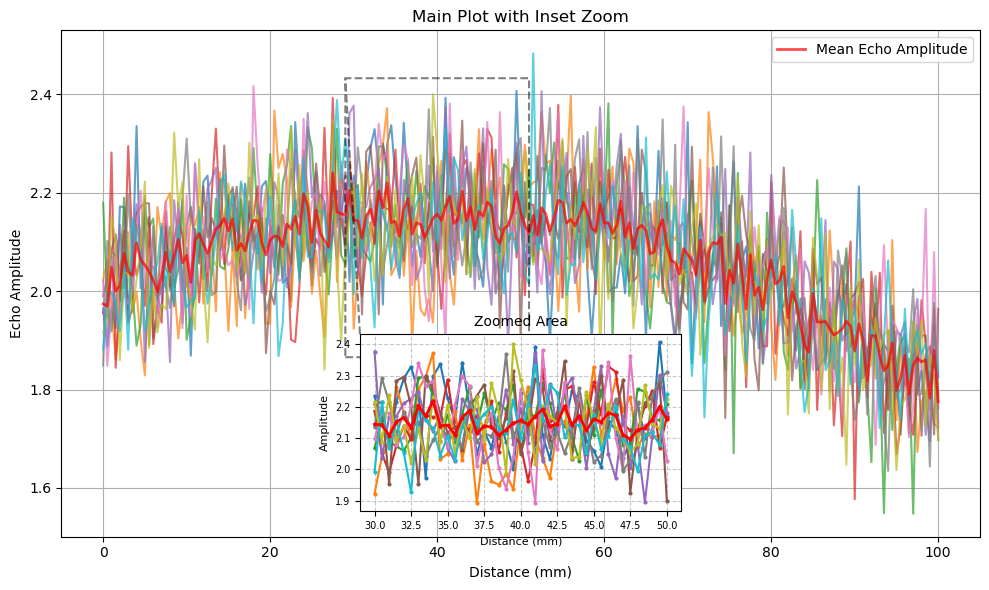

In [5]:
# next lines are needed to find data and code
from pathlib import Path
import sys
# notebook folder (D:\proyecto_dardos\notebooks)
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
# add foler 'codigo' to the modeules path
sys.path.append(str(project_root / "codigo"))

import numpy as np  # importamos numpy, librería de cálculo científico 
from scipy import signal  # importamos numpy, librería de procesado de señal
from scipy import stats  # importamos numpy, librería de estadística y probabilidad
import matplotlib.pylab as plt  # importamos matplotly, librería para representacion gráfica

# Here we create our function to load the data
def loadmydata(fname, N, Nsets):
    y = np.loadtxt(fname=fname)
    # Comprobación opcional para evitar errores silenciosos
    if y.size != N * Nsets:
        raise ValueError(f"Tamaño de datos {y.size} != N*Nsets = {N*Nsets}")
    y = np.reshape(y, (Nsets, N)).T
    return y

distance = np.loadtxt(fname=str(project_root) + '/data/Datos_P2_txt/EM1_TA_1_X.txt',max_rows=None)
N = len(distance)

# load EM1 (all sets):
Echo_Amp = loadmydata(fname=str(project_root) + '/data/Datos_P2_txt/EM1_TA_10_Y.txt', N=N, Nsets=10)
Mean_Echo_Amp = np.mean(Echo_Amp, axis=1)


# Let's define the region we want to zoom in on
zoom_start_x = 30/1000
zoom_end_x = 50/1000
zoom_indices = (distance >= zoom_start_x) & (distance <= zoom_end_x)
zoomed_distance = distance[zoom_indices]
zoomed_amplitude = Echo_Amp[zoom_indices]
zoomed_mean_amplitude = Mean_Echo_Amp[zoom_indices]

# --- 2. Create the main plot ---
fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and a main axes object

# Plot the full data on the main axes
ax.plot(distance*1000, Echo_Amp, alpha=0.7)
ax.plot(distance*1000, Mean_Echo_Amp, color='red', lw=2, label='Mean Echo Amplitude', alpha=0.7)
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("Echo Amplitude")
ax.set_title("Main Plot with Inset Zoom")
ax.grid(True)
ax.legend()

# --- 3. Create the inset plot ---
# The inset_axes method creates a new Axes object that is positioned relative to 'ax' (the parent axes).
# [x, y, width, height] are in fractions of the parent axes width/height.
# For example, [0.6, 0.6, 0.3, 0.3] means:
#   - Start at 60% of the parent axes width from the left
#   - Start at 60% of the parent axes height from the bottom
#   - Have a width of 30% of the parent axes width
#   - Have a height of 30% of the parent axes height
# Calculate x for centering: (1 - inset_width) / 2
inset_width = 0.35
inset_height = 0.35
inset_x_centered = (1 - inset_width) / 2
inset_y_bottom = 0.05 # A small value to place it near the bottom

# Position the inset axes in the bottom-center
axins = ax.inset_axes([inset_x_centered, inset_y_bottom, inset_width, inset_height])

# Plot the zoomed data on the inset axes
axins.plot(zoomed_distance*1000, zoomed_amplitude, linestyle='-', marker='.', markersize=4)
axins.plot(zoomed_distance*1000, zoomed_mean_amplitude, linestyle='-', marker='.', 
           color='red', lw=2, markersize=4, label='Zoomed Region')
axins.set_title("Zoomed Area", fontsize=10) # Title for the inset
axins.set_xlabel("Distance (mm)", fontsize=8) # Smaller labels for inset
axins.set_ylabel("Amplitude", fontsize=8)
axins.tick_params(labelsize=7) # Smaller tick labels
axins.grid(True, linestyle='--', alpha=0.7) # Grid for the inset

# --- 4. (Optional but recommended) Indicate the zoomed region on the main plot ---
# This draws a rectangle on the main plot to show exactly what area is being magnified.
# And connects the inset box to the magnified region using lines.
ax.indicate_inset_zoom(axins, edgecolor="black", linestyle='--', linewidth=1.5)

plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show()

In the previous figure we can see that the amplitud of the echoes follows a parabolic trend, as expected. There will be a maximum at the focal point. Unfortunately, even the average of all the measures has a significant variance. As it is clearly a linear model, we are going to use the LSE. According to the model, at each particular distance $d$ from the transducer, the amplitud will be obtained from a parabolic curve of unknown parameters:
$$
\text{Echo amplitude} = a\cdot d^2 + b\cdot d + c + w
$$

* $d$: distance
* $\underline{\theta}=[\theta_1, \theta_2, \theta_3]=[a, b, c]$, unknown parameters
* $s[d]=\underline{s}$: Echo amplitude (model)
* $\underline{w}=WG noise\sim N(\mu, \sigma^2), but there is no need to know it!
* $x[n]=\underline{x}$: The averaged echo amplitude (observation or measure)
* $\underline{\underline{H}}$: observation matrix, build using the distances:

$$
 \underline{\underline{H}}^T=\begin{pmatrix}
d_1^2 & d_1 & 1 \\
d_2^2 & d_2 & 1 \\
 \vdots & \vdots  & \vdots \\
 d_N^2& d_N & \vdots \\
\end{pmatrix}
$$

Now we will just have to find $\hat{\theta}=[\hat{a}, \hat{b}, \hat{c}]$ using the expressions seen before. Once the estimation is done, the focal point will be the maximum of the parabola, which can be easily calculated by computing the derivative of the parabola and setting it to zero, which gives us $d_{max}=b/a$.

Estimated parameters [a, b, c] = [-100.55, 8.00, 2.00]
The focal point is located at d= 39.7833 mm


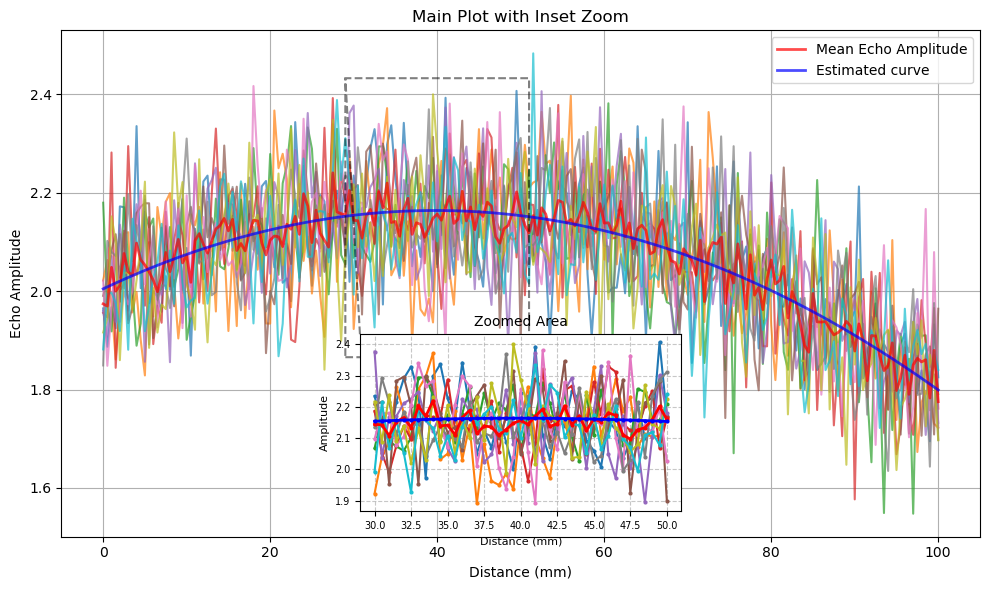

In [22]:
H = np.ones([len(distance),3])
H[:,1] = distance
H[:,0] = distance**2
theta_hat = np.dot(np.dot(np.linalg.inv(np.dot(H.T, H)), H.T), Mean_Echo_Amp)

X = theta_hat[0]*(distance**2) + theta_hat[1]*distance + theta_hat[2]

print(f"Estimated parameters [a, b, c] = [{theta_hat[0]:.2f}, {theta_hat[1]:.2f}, {theta_hat[2]:.2f}]")
print(f"The focal point is located at d= {-1000*theta_hat[1]/(2*theta_hat[0]):.4f} mm")

zoomed_X = X[zoom_indices]
# --- 2. Create the main plot ---
fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and a main axes object

# Plot the full data on the main axes
ax.plot(distance*1000, Echo_Amp, alpha=0.7)
ax.plot(distance*1000, Mean_Echo_Amp, color='red', lw=2, label='Mean Echo Amplitude', alpha=0.7)
ax.plot(distance*1000, X, color='blue', lw=2, label='Estimated curve', alpha=0.7)
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("Echo Amplitude")
ax.set_title("Main Plot with Inset Zoom")
ax.grid(True)
ax.legend()

# --- 3. Create the inset plot ---
# The inset_axes method creates a new Axes object that is positioned relative to 'ax' (the parent axes).
# [x, y, width, height] are in fractions of the parent axes width/height.
# For example, [0.6, 0.6, 0.3, 0.3] means:
#   - Start at 60% of the parent axes width from the left
#   - Start at 60% of the parent axes height from the bottom
#   - Have a width of 30% of the parent axes width
#   - Have a height of 30% of the parent axes height
# Calculate x for centering: (1 - inset_width) / 2
inset_width = 0.35
inset_height = 0.35
inset_x_centered = (1 - inset_width) / 2
inset_y_bottom = 0.05 # A small value to place it near the bottom

# Position the inset axes in the bottom-center
axins = ax.inset_axes([inset_x_centered, inset_y_bottom, inset_width, inset_height])

# Plot the zoomed data on the inset axes
axins.plot(zoomed_distance*1000, zoomed_amplitude, linestyle='-', marker='.', markersize=4)
axins.plot(zoomed_distance*1000, zoomed_mean_amplitude, linestyle='-', marker='.', 
           color='red', lw=2, markersize=4, label='Zoomed Region')
axins.plot(zoomed_distance*1000, zoomed_X, linestyle='-', marker='.', 
           color='blue', lw=2, markersize=4, label='Zoomed Region')
axins.set_title("Zoomed Area", fontsize=10) # Title for the inset
axins.set_xlabel("Distance (mm)", fontsize=8) # Smaller labels for inset
axins.set_ylabel("Amplitude", fontsize=8)
axins.tick_params(labelsize=7) # Smaller tick labels
axins.grid(True, linestyle='--', alpha=0.7) # Grid for the inset

# --- 4. (Optional but recommended) Indicate the zoomed region on the main plot ---
# This draws a rectangle on the main plot to show exactly what area is being magnified.
# And connects the inset box to the magnified region using lines.
ax.indicate_inset_zoom(axins, edgecolor="black", linestyle='--', linewidth=1.5)

plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show()


## Bayesian Estimators

So far, with MLE and LSE, we've treated the unknown parameter $\theta$ as a fixed (though unknown) value. Bayesian estimation takes a different approach by treating $\theta$ itself as a **random variable**.

### Bayesian Estimators: The Core Idea

*   **How it differs from Classical Methods:**
    *   **Classical (MLE/LSE):** We assume $\theta$ is a fixed, unknown constant. We maximize the likelihood of the *data given $\theta$*, $p(\mathbf{x}; \theta)$.
    *   **Bayesian:** We treat $\theta$ as a random variable with its own probability distribution. We combine our *prior belief* about $\theta$ with the *evidence from the data* to get an updated (posterior) belief about $\theta$.
*   **How it works (Bayes' Theorem):**
    *   The heart of Bayesian estimation is **Bayes' Theorem**, which updates our belief about $\theta$ after observing the data $\mathbf{x}$:

        $P(\theta | \mathbf{x}) = \frac{P(\mathbf{x} | \theta) \cdot P(\theta)}{P(\mathbf{x})}$

        *   $P(\theta | \mathbf{x})$: **Posterior Probability** (What we believe about $\theta$ *after* seeing the data $\mathbf{x}$). This is what we want!
        *   $P(\mathbf{x} | \theta)$: **Likelihood** (The probability of observing data $\mathbf{x}$ *given* $\theta$). This is the same likelihood used in MLE.
        *   $P(\theta)$: **Prior Probability** (What we believed about $\theta$ *before* seeing any data). This is our initial guess or knowledge.
        *   $P(\mathbf{x})$: Evidence (A normalizing constant).

*   **When to use it?**
    *   When we have **prior knowledge** about the parameter that we want to incorporate.
    *   When dealing with **limited data**, as the prior can help regularize the estimate.
    *   Forms the foundation for many advanced techniques in machine learning and probabilistic AI.

Now, let's look at two common Bayesian estimators:

### 1. Maximum A Posteriori (MAP) Estimator

*   **What is it?**
    *   The MAP estimator selects the value of $\theta$ that has the **highest posterior probability** given the observed data $\mathbf{x}$.
    *   It's like MLE, but instead of maximizing just the likelihood, it maximizes the posterior probability (which includes the prior).
*   **Intuition Basic:**
    *   "Given my prior beliefs about $\theta$ AND the data I've observed, what is the *single most probable value* for $\theta$?"
    *   If your prior is very flat (i.e., you have no strong prior belief), the MAP estimate will often be very close to the MLE estimate. The stronger your prior, the more it influences the estimate.
*   **Example:**
    *   Imagine we're estimating the average height ($\theta$) of students in a class.
        *   **Prior:** We might know that heights generally follow a Gaussian distribution with a mean of 170cm from previous classes. ($P(\theta)$)
        *   **Likelihood:** We measure the heights of 5 students. ($P(\mathbf{x} | \theta)$)
        *   **MAP:** We combine our prior (170cm average) with the 5 measurements to get the most probable average height for *this specific class*. If the 5 students were all very tall, the MAP would shift the estimate upwards from 170cm, but maybe not as much as a pure MLE would, due to the prior pulling it towards 170cm.

### 2. Minimum Mean Squared Error (MMSE) Estimator

*   **What is it?**
    *   The MMSE estimator calculates the **conditional expectation of $\theta$ given the data $\mathbf{x}$**. It is the mean of the posterior distribution.
    *   It minimizes the **mean squared error** among all possible estimators (hence the name "Minimum MSE").
*   **Intuition Basic:**
    *   "What is the *average value* of $\theta$ given what I've observed and my prior beliefs?"
    *   While MAP gives you the *peak* of your belief, MMSE gives you the *average*. If the posterior distribution is symmetric and unimodal (like a Gaussian), MMSE and MAP will be the same.
*   **Example (continuing the height example):**
    *   Instead of picking the single most probable height (MAP), the MMSE would give you the *expected* average height of the class, considering the entire updated probability distribution of $\theta$ (the posterior). It's often a "smoother" estimate than MAP.
    *   This is often preferred when the *cost of error* is proportional to the square of the error (which is very common).

### 3. Derivation of the Gaussian–Gaussian Posterior

#### 1. Likelihood model
We observe N meassures:
$$
y_i = \theta + w_i, \qquad w_i \sim \mathcal{N}(0,\sigma^2),
$$

which implies:
$$
\bar{y} = \frac{1}{N}\sum_{i=1}^N y_i,
$$

and:

$$
\bar{y} \mid \theta \sim \mathcal{N}\left(\theta,\ \frac{\sigma^2}{N}\right).
$$

Thus:

$$
p(\bar{y} \mid \theta)
\propto
\exp\!\left( -\frac{1}{2}\frac{(\bar{y}-\theta)^2}{\sigma^2/N} \right).
$$

#### 2. Prior

$$
\theta \sim \mathcal{N}(\mu_0, \sigma_0^2).
$$

#### 3. Posterior
$$
p(\theta \mid \bar{y})
\propto
p(\bar{y} \mid \theta)p(\theta).
$$

Combining exponents yields:

$$p(\theta \mid \bar{y})
\propto
\exp\!\left[
-\frac{1}{2}
\left(
\theta^2\left(\frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)
-
2\theta\left(\frac{N\bar{y}}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right)
+ \text{const}
\right)
\right].
$$

This matches a Gaussian density.

#### 4. Posterior parameters
$$
\frac{1}{\sigma_N^2}
=
\frac{N}{\sigma^2}
+
\frac{1}{\sigma_0^2},
$$

$$
\frac{\mu_N}{\sigma_N^2}
=
\frac{N\bar{y}}{\sigma^2}
+
\frac{\mu_0}{\sigma_0^2}.
$$

Therefore:

$$
\boxed{
\sigma_N^2
=
\left( 
\frac{N}{\sigma^2} +
\frac{1}{\sigma_0^2}
\right)^{-1}
}
$$

$$
\boxed{
\mu_N
=
\sigma_N^2
\left(
\frac{N\bar{y}}{\sigma^2}
+
\frac{\mu_0}{\sigma_0^2}
\right)
}
$$

#### 5. Engineering intuition
- Posterior variance decreases as data accumulate.
- Posterior mean is a weighted combination:

$$
\mu_N = 
w_{\text{data}}\,\bar{y}
+
w_{\text{prior}}\,\mu_0,
$$

with weights proportional to precisions.

---

**Summary of Bayesian Estimators:**

*   **Key Difference:** Incorporate **prior knowledge** about $\theta$.
*   **How it works:** Uses Bayes' Theorem to update prior beliefs into a posterior distribution.
*   **MAP:** Chooses the $\theta$ that maximizes the posterior probability (the most probable $\theta$).
*   **MMSE:** Chooses the $\theta$ that is the mean of the posterior distribution (the average $\theta$, minimizing the squared error).

### Example: Estimating a Noisy Sensor Reading

Imagine you have a **temperature sensor** in an industrial process. The true temperature ($\theta$) is constant but unknown. Your sensor provides readings ($\mathbf{x}$), but these readings are always corrupted by noise.

**Scenario:** We want to estimate the true temperature $\theta$.

**1. Prior Knowledge ($P(\theta)$ - Our initial belief):**
*   From historical data or the specifications of the process, we might know that the temperature *usually* hovers around 50°C, and rarely goes below 40°C or above 60°C.
*   We can model this as a **Gaussian prior** for $\theta$, with a mean of 50°C and a standard deviation of 5°C. This represents our initial belief *before* seeing any new sensor data.

**2. Likelihood ($P(\mathbf{x} | \theta)$ - Evidence from data):**
*   We take a new sensor reading $\mathbf{x} = 53°C$.
*   We also know the sensor has some measurement error (noise), which we can model as Gaussian with a known standard deviation (e.g., 2°C).
*   So, if the true temperature *were* $\theta$, the likelihood $P(\mathbf{x} | \theta)$ tells us how probable it is to get a reading of 53°C.

**3. Posterior Probability ($P(\theta | \mathbf{x})$ - Updated belief):**
*   Using Bayes' Theorem, we combine our prior belief (temperature around 50°C) with the new observation (sensor reading 53°C).
*   The resulting **posterior distribution** $P(\theta | \mathbf{x})$ will be a new Gaussian distribution. It will be centered somewhere between 50°C (prior mean) and 53°C (current reading), with a smaller variance than both the prior and the likelihood, indicating increased certainty. The exact location depends on the relative "strength" of the prior vs. the sensor's precision.

**4. Bayesian Estimators:**

*   **MAP Estimate:** The peak (mode) of this posterior distribution. It would be the single most probable true temperature, say 52°C.
*   **MMSE Estimate:** The mean of this posterior distribution. If the posterior is Gaussian, the MAP and MMSE estimates will be the same. The MMSE estimate would also be 52°C, representing the best "average" estimate of the true temperature.

**Why Bayesian here?** If we only had one noisy reading (53°C), an MLE might simply estimate $\theta = 53°C$. But if we *know* the temperature rarely deviates much from 50°C, the Bayesian approach provides a more robust estimate by pulling it slightly back towards 50°C, reflecting our prior knowledge.


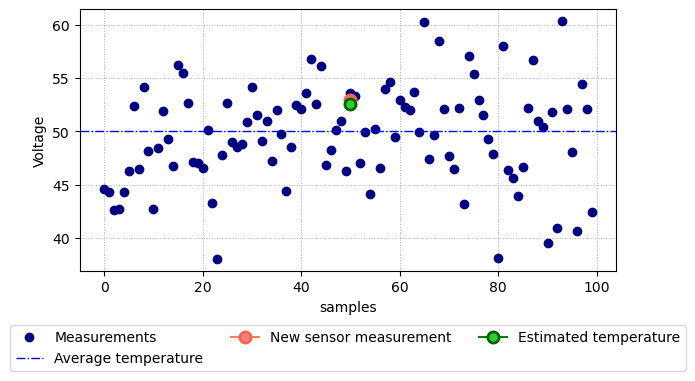

The average value of the Temperature (priori) is 50.00 °C
The standard deviation of the Temperature (priori) is 5.00 °C
The tempereture measured with the new sensor is 53.00 °C
The standard deviation of the new sensor is 2.00 °C
The standard deviation of the Temperature (posteriori) is 1.86 °C
The mean of the Temperature (posteriori) is 52.59 °C
Bayesian etimate (MAP/MMSE) of the temperature is 52.59 °C


In [2]:
# Import libraries
import numpy as np
import matplotlib.pylab as plt 

# Set constans, a priori knowledge, we assumen gaussian distribution of the temperature N(50,25)
T0 = 50 # average temperature value, in °C
var_priori = 25 # variance: variability of the temperature, this is due to the noise of the sensor
std_priori = np.sqrt(var_priori) # std deviation of the temperature, in °C
mean_priori = T0 # the meanof the noise of the sensor, in °C

# set constants, new device, we assumen gaussian noise in the sensor N(0,4)
T_ns = 53 # temperature measured with the new sensor, in °C
var_ns = 4 # variance: variability of the sensor
std_ns = 2 # std deviation of the new sensor, in °C
mean_ns = 0 # mean of the new sensor in °C, we assume is zero, if not, we can change

# calculate new parameters of the temperature, assuming we are using that sensor
var_posteriori = 1 / ( (1/var_priori) + (1/var_ns) )
std_posteriori = np.sqrt(var_posteriori) # std deviation of the psteriori measurement, in °C
mean_posteriori = ( mean_priori/var_priori + (T_ns+mean_ns) /var_ns ) / ( 1/var_posteriori )


# take N samples
N = 100 # number of samples we acquiere
x = np.random.normal(loc=mean_priori, scale=std_priori, size=N) # generate N samples of temperature

# --- Plot ---
plt.figure(figsize=(7, 4))
plt.plot(x, 'o', color='navy', label='Measurements')
plt.axhline(y=T0, color='blue', linestyle='-.', linewidth=1, label='Average temperature')
plt.plot(N/2, T_ns,
         marker='o',          # Circle marker
         markersize=8,       # Size of the circle
         color='coral',        # Color of the marker edge and interior (if mfc not set)
         markerfacecolor='lightcoral', # Interior color
         markeredgecolor='tomato',  # Edge color
         markeredgewidth=2,   # Edge width
         label='New sensor measurement')

plt.plot(N/2, mean_posteriori,
         marker='o',          # Circle marker
         markersize=8,       # Size of the circle
         color='green',        # Color of the marker edge and interior (if mfc not set)
         markerfacecolor='limegreen', # Interior color
         markeredgecolor='darkgreen',  # Edge color
         markeredgewidth=2,   # Edge width
         label='Estimated temperature')

plt.xlabel('samples')
plt.ylabel('Voltage')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

print(f"The average value of the Temperature (priori) is {T0:.2f} °C")
print(f"The standard deviation of the Temperature (priori) is {std_priori:.2f} °C")
print(f"The tempereture measured with the new sensor is {T_ns:.2f} °C")
print(f"The standard deviation of the new sensor is {std_ns:.2f} °C")
print(f"The standard deviation of the Temperature (posteriori) is {std_posteriori:.2f} °C")
print(f"The mean of the Temperature (posteriori) is {mean_posteriori:.2f} °C")
print(f"Bayesian etimate (MAP/MMSE) of the temperature is {mean_posteriori:.2f} °C")


### Dart Game Example: Estimating a Player's True Skill (Average Score)

**Scenario:** You want to estimate a player's true average score ($\theta$) after a few throws. Each throw is an "observation" ($\mathbf{x}$).

**1. Prior Knowledge ($P(\theta)$ - Our initial belief about a player's skill):**
*   Before a player even throws, you might have a **prior belief about their skill**.
    *   **"Novice":** Maybe you assume new players generally have an average score around 20 points per throw, with a wide variability (high standard deviation in your prior).
    *   **"Experienced":** For a known player, you might have a tighter prior around, say, 60 points.
*   This prior knowledge for $\theta$ (true average score) could be a Gaussian distribution.

**2. Likelihood ($P(\mathbf{x} | \theta)$ - Evidence from throws):**
*   The player makes 5 throws: $\mathbf{x} = [30, 45, 20, 35, 25]$.
*   For a given true skill $\theta$, there's a certain probability of observing these scores. The "noise" here comes from the inherent variability in a player's throws (they don't hit their average exactly every time). This could also be modeled (e.g., as Gaussian distribution around their true average skill).

**3. Posterior Probability ($P(\theta | \mathbf{x})$ - Updated belief):**
*   Bayes' Theorem combines your initial belief about their skill ($P(\theta)$) with the observed scores ($P(\mathbf{x} | \theta)$).
*   The resulting posterior distribution will give you an updated probability distribution for their true skill.

**4. Bayesian Estimators:**

*   **MAP Estimate:** This would be the "most probable" true average score for the player after those 5 throws, considering both your initial assumptions and their performance.
*   **MMSE Estimate:** This would be the *expected* true average score, minimizing the squared error.

**Why Bayesian here?**
*   **Limited Data:** After only 5 throws, a simple average (which is an MLE for Gaussian noise) might be very volatile. If a novice player gets lucky with a few high scores, the MLE might overstate their skill. The Bayesian approach, using a "novice prior," would temper that estimate, providing a more realistic and robust assessment of their skill.
*   **Incorporating Prior Knowledge:** It's great for ranking players where you have some prior sense of their ability (e.g., a professional vs. a beginner). The Bayesian estimate would quickly converge towards their true skill with more data, but the prior provides stability with little data.

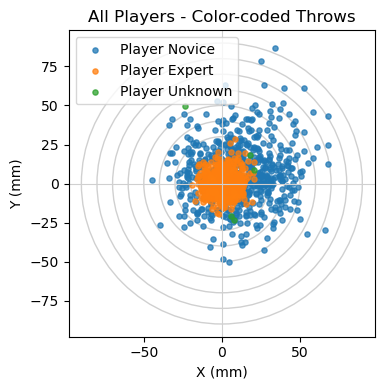

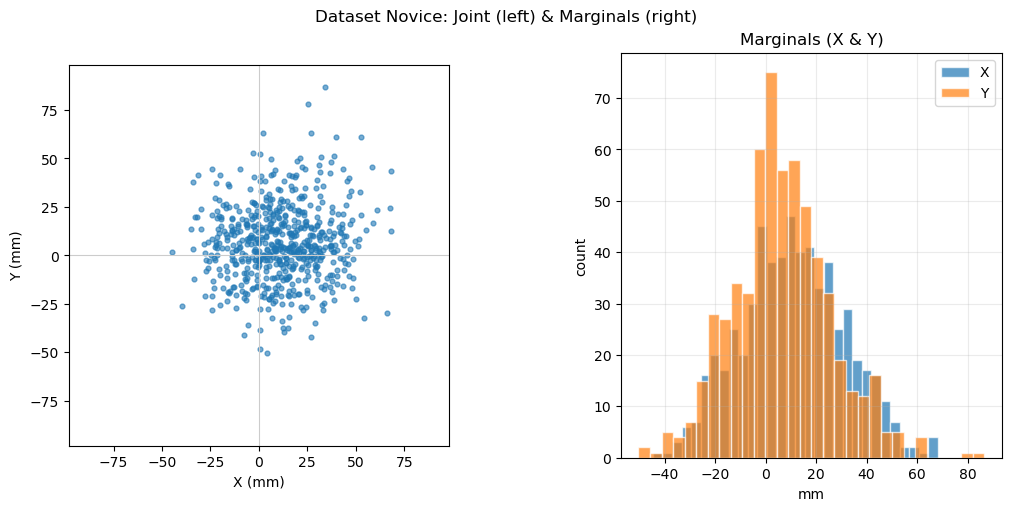

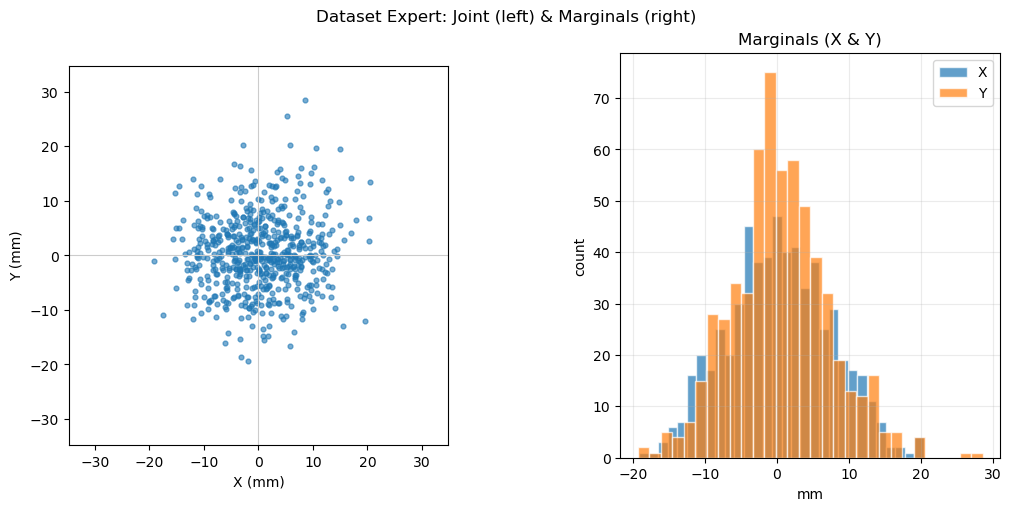

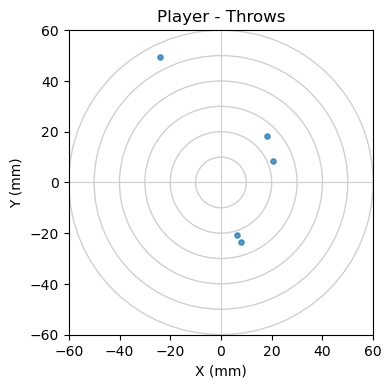

In [25]:
# Data collection
"""
As we have no idea about the data, the first will be to plot the players shots'.
"""
# next library is provided by the professor, should be in your notebook path
import codigo.dartslab as dl 

# Load previously generated CSVs
# Update these paths to where your instructor placed the data files.
paths = {"Novice": str(project_root)+"/data/darts_data_novice/darts_A.csv",
         "Expert": str(project_root)+"/data/darts_data_expert/darts_A.csv",
         "Unknown": str(project_root)+"/data/darts_data_5_shots_novice/darts_A.csv"}
datasets = dl.load_many(paths)

#for name, df in datasets.items():
#    print(name, df.shape)
#    print(df.head())
 
# Show all players together on one dartboard
fig, ax = dl.scatter_all(datasets)
dl.scatter_and_hist(datasets["Novice"], title=f"Dataset Novice: Joint (left) & Marginals (right)", bins=30)
dl.scatter_and_hist(datasets["Expert"], title=f"Dataset Expert: Joint (left) & Marginals (right)", bins=30)
dl.scatter_player(datasets["Unknown"]);